In [2]:
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm

import h5py as h5
import numpy as np
import time

import config
import util

if __name__ == "__main__":
    print "Loading data.."
    data, labels, lz = util.load_data()
    data = data.astype('float32')
    data /= 255
    lz = np.array(lz)
    print lz.shape
    print "Data loaded !"

    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33)
    Y_train = np_utils.to_categorical(y_train, config.nb_class)
    Y_test = np_utils.to_categorical(y_test, config.nb_class)

    model = util.load_alexnet_model_finetune56(weights_path=config.alexnet_weights_path, nb_class=config.nb_class, top_model_weight_path="../dataset/alex_finetune56_weights1.h5")

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=SGD(lr=1e-6, momentum=0.9),
        metrics=['accuracy'])

    print "Evaluating.."

    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Softmax %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

  

Loading data..
(2000L,)
Data loaded !
Weights for "dense_1" are loaded
Weights for "dense_2" are loaded
Weights for "dense_3" are loaded
Evaluating..
Softmax acc: 0.45%


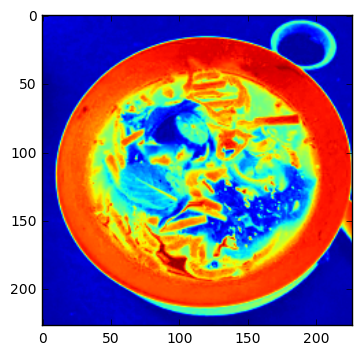

In [17]:
plt.imshow(X_test[0, 0])
plt.show()

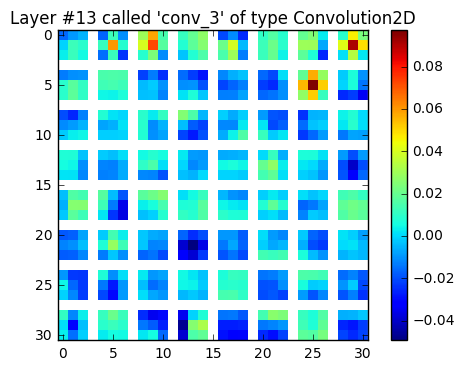

In [34]:
from kerastoolbox.visu import plot_weights
plot_weights(model, layer_id=13, n=256, ax=None, cmap=None)
plt.show()

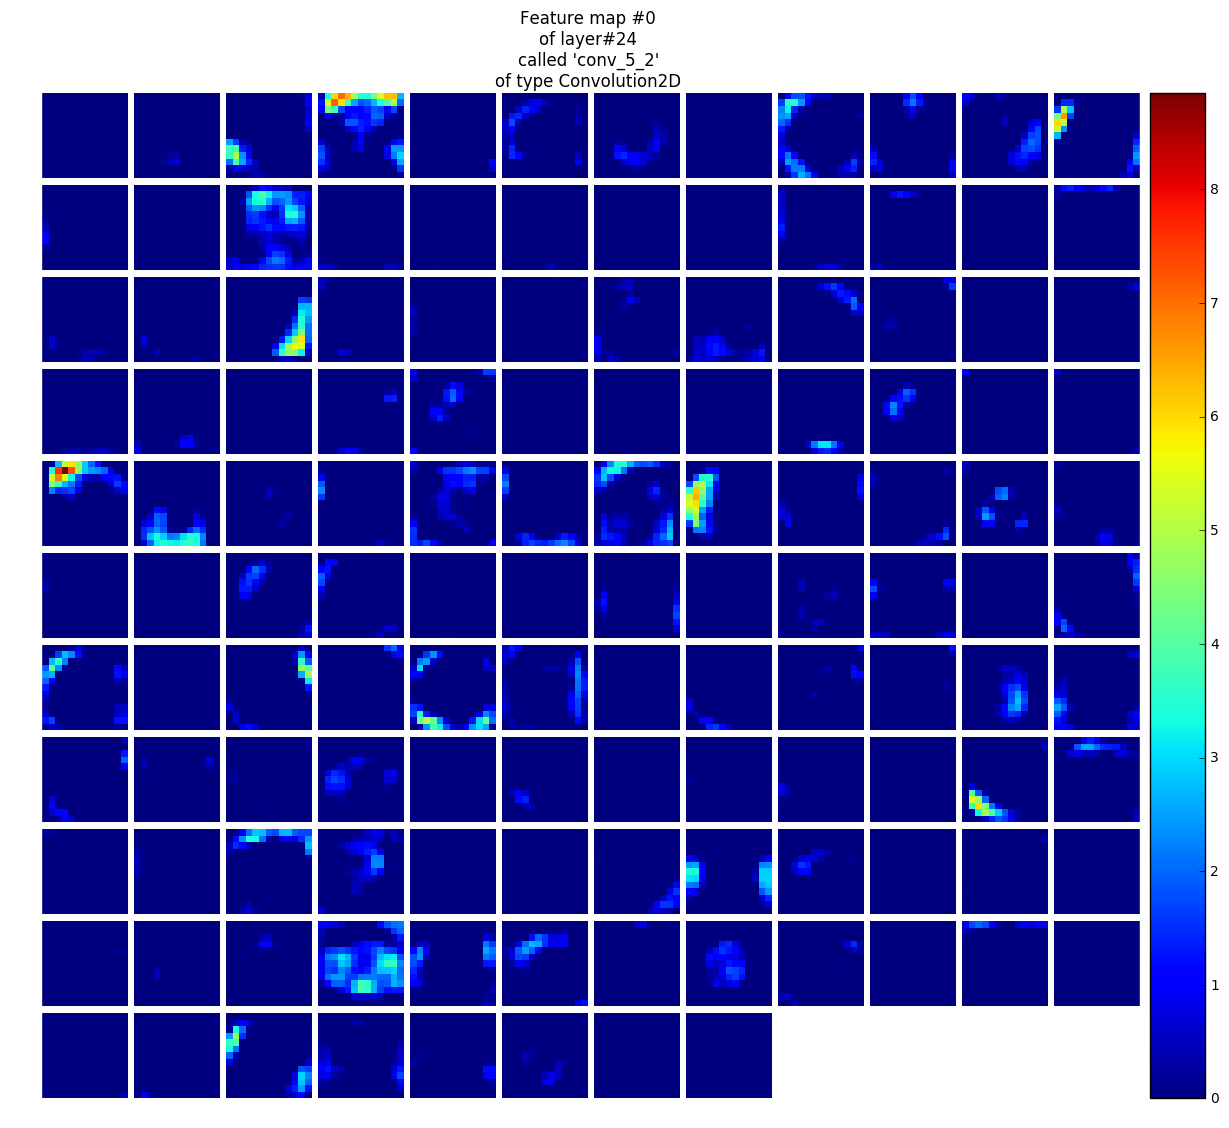

In [26]:
from kerastoolbox.visu import plot_feature_map

images = X_test[:1]
_ = plot_feature_map(model, X=images, layer_id=24, n_columns=1, n=254, cmap=None)
plt.show()